* **Sales Analysis**

**Applied Data Science with Python

AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions.


This analysis mainly trying to answer two questions:
- Determine the states that are generating the highest revenues
- Formulate sales programs for states with lower revenues

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing #machine learning library that provides efficient tools for data preprocessing

In [2]:
# import dataset as pandas dataframe             
superstore = pd.read_excel('ausapparalsales4thqrt2020.xlsx')
# preview first 5 rows of dataset
superstore.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


From the preview above, 
There is a gruop  compose of kids,men,seniors and women. 
Each row have a total Seles for specific one group per day time { morning, afternoon and evening} per state.
The data have a total daily sales for each day time for each state. 

In [3]:
# shape of dataframe
superstore.shape

(7560, 6)

In [ ]:
The data heve 7560 of sales data (rows)

In [4]:
# Get Data summary
superstore.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


Notice that Date is in datetine64 format. No conversion is needed.

***Data Wrangling

Ensure that the data is clean and that there is no missing or incorrect data. 
Inspect the data manually for missing/incorrect data using the functions isna(), and notna().

In [5]:
# check for null values
superstore.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
#another faster check for nulls
superstore.isnull().values.any()

False

In [7]:
superstore.notna().sum() 

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [8]:
# check for duplicate values and remove them
superstore.duplicated().sum() 

0

All column contains zero nul, that indicates its a clean data.
As there is no missing data or duplication, there is no need for more treating.

In [9]:
#For this analysis Unit is not an interested features, it is droped 
superstore=superstore.drop(columns='Unit')

***Normalization

It helps to ensure that the data is consistent and standardized, which can improve the accuracy and performance of machine learning models for next step if needed.It ensures that all features contribute equally to the analysis and prevents certain features from dominating others

In [10]:
# Extract numerical features
numeric_array = superstore['Sales']
print("Sales array: ",numeric_array)

normalized_arr = preprocessing.normalize([numeric_array])
print("Normalized Sales array: ",normalized_arr)

Sales array:  0       20000
1       20000
2       10000
3       37500
4        7500
        ...  
7555    35000
7556    37500
7557    37500
7558    27500
7559    32500
Name: Sales, Length: 7560, dtype: int64
Normalized Sales array:  [[0.00415391 0.00415391 0.00207695 ... 0.00778857 0.00571162 0.0067501 ]]


**Data Analysis

In [81]:
from sklearn.preprocessing import StandardScaler
X= [superstore['Sales']]
# Normalize data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Print normalized data
print(X_normalized)

[[0. 0. 0. ... 0. 0. 0.]]


***descriptive statistical analysis on the data

The The data is mainly about sales. Some statisic. Here is some statistic 

In [18]:
#get more detatils about the sales
superstore['Sales'].describe()

count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

The minimum sales per day was 5k. In contract the highest was 162500 ~= One millions and a half.
In average the sales = 45k

**Analyzing the sales per group type**

In [11]:
#Total sales per group
superstore.groupby(['Group']).sum()

,Sales
Group,
Kids,85072500
Men,85750000
Seniors,84037500
Women,85442500


- Determine which group is generating the highest sales, and which group is generating the lowest sales

In [19]:
#Total sales per group arranged in highest sales
superstore.groupby("Group")["Sales"].sum().sort_values(ascending=False)

Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
Name: Sales, dtype: int64

Among all group [men , woman, kids, senior], **men** having the most purchase.

- Determine which group is generating the lowest sales

In [20]:
superstore.groupby("Group")["Sales"].sum().sort_values(ascending=True)

Group
 Seniors    84037500
 Kids       85072500
 Women      85442500
 Men        85750000
Name: Sales, dtype: int64

Among all group [men , woman, kids, senior], **seniors** having the least purchase.

**Analyzing the sales per state**

- Determine which state is generating the highest sales

In [14]:
#Total sales per state
state_sale=superstore.groupby(['State']).sum()
state_sale.sort_values('Sales', ascending=False) 

,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


The **VIC** state has the highest sales

- Determine which state is generating the lowest sales.

In [21]:
superstore.groupby("State")["Sales"].sum().sort_values(ascending=True)

State
 WA      22152500
 NT      22580000
 TAS     22760000
 QLD     33417500
 SA      58857500
 NSW     74970000
 VIC    105565000
Name: Sales, dtype: int64

The **WA** state has the highest sales

Analyzing the sales / state for each group

In [32]:
#Total sales of states per group
sales_per_state_for_group=superstore.groupby(['State','Group']).sum()
sales_per_state_for_group

Sales
State Group             
 NSW   Kids     18587500
       Men      19022500
       Seniors  18187500
       Women    19172500
 NT    Kids      5700000
       Men       5762500
       Seniors   5465000
       Women     5652500
 QLD   Kids      8510000
       Men       8392500
       Seniors   8190000
       Women     8325000
 SA    Kids     14515000
       Men      14655000
       Seniors  14717500
       Women    14970000
 TAS   Kids      5775000
       Men       5757500
       Seniors   5650000
       Women     5577500
 VIC   Kids     26360000
       Men      26407500
       Seniors  26315000
       Women    26482500
 WA    Kids      5625000
       Men       5752500
       Seniors   5512500
       Women     5262500

In [33]:
sales_per_state_for_group[sales_per_state_for_group.Sales == sales_per_state_for_group.Sales.max()]

,,Sales
State,Group,
VIC,Women,26482500


**Woeman** are the major group of rising sales in VIC state

In [34]:
sales_per_state_for_group[sales_per_state_for_group.Sales == sales_per_state_for_group.Sales.min()]

,,Sales
State,Group,
WA,Women,5262500


**Woeman** are the least group interested in WA state

Analyzing the sales / state for each day time

In [36]:
#Total sales for every state per daytime
sales_per_state_per_time =superstore.groupby(['State','Time']).sum()
sales_per_state_per_time

Sales
State Time                
 NSW   Afternoon  25110000
       Evening    24712500
       Morning    25147500
 NT    Afternoon   7510000
       Evening     7627500
       Morning     7442500
 QLD   Afternoon  11347500
       Evening    10632500
       Morning    11437500
 SA    Afternoon  20025000
       Evening    19367500
       Morning    19465000
 TAS   Afternoon   7670000
       Evening     7565000
       Morning     7525000
 VIC   Afternoon  35062500
       Evening    34880000
       Morning    35622500
 WA    Afternoon   7282500
       Evening     7302500
       Morning     7567500

In [37]:
sales_per_state_per_time[sales_per_state_per_time.Sales == sales_per_state_per_time.Sales.max()]

,,Sales
State,Time,
VIC,Morning,35622500


Morining at VIC is giving a higer sales among other sate/daytime

In [38]:
sales_per_state_per_time[sales_per_state_per_time.Sales == sales_per_state_per_time.Sales.min()]

,,Sales
State,Time,
WA,Afternoon,7282500


Afternoon at VIC is giving a higer sales among other sate/daytime

In [40]:
#Total sales for every state for each group at daytime
sales_state_time_group= superstore.groupby(['State','Time','Group']).sum()
sales_state_time_group

Sales
State Time       Group            
 NSW   Afternoon  Kids     6187500
                  Men      6512500
                  Seniors  5985000
                  Women    6425000
       Evening    Kids     6132500
...                            ...
 WA    Evening    Women    1810000
       Morning    Kids     1842500
                  Men      2007500
                  Seniors  1950000
                  Women    1767500

[84 rows x 1 columns]

In [41]:
sales_state_time_group[sales_state_time_group.Sales == sales_state_time_group.Sales.max()]

,,,Sales
State,Time,Group,
VIC,Morning,Seniors,9057500


Now we get clue about what specific group raising the sales in VIC.  

In [42]:
sales_state_time_group[sales_state_time_group.Sales == sales_state_time_group.Sales.min()]

,,,Sales
State,Time,Group,
WA,Afternoon,Women,1685000


Now we get clue about what specific group having less sales in WA.  

- Generate weekly, monthly and quarterly reports for the analysis made

In [43]:
#weekly

superstore.groupby([pd.Grouper(key='Date', freq='W')])['Sales'].sum()

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

In [49]:
#monthly
superstore.groupby([pd.Grouper(key='Date', freq='M')])['Sales'].sum().sort_values(ascending=True)

Date
2020-11-30     90682500
2020-10-31    114290000
2020-12-31    135330000
Name: Sales, dtype: int64

The least sales happened in month of November. The highest happened in December.

In [46]:
#Monthly statistic 
superstore.groupby([pd.Grouper(key='Date', freq='M')])['Sales'].agg(['min','mean','max','sum'])

,min,mean,max,sum
Date,,,,
2020-10-31,7500,45353.174603,125000,114290000
2020-11-30,5000,35985.119048,112500,90682500
2020-12-31,12500,53702.380952,162500,135330000


In [45]:
#quarterly
superstore.groupby([pd.Grouper(key='Date', freq='Q')])['Sales'].sum()

Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64

In [47]:
#quarterly statistic 
superstore.groupby([pd.Grouper(key='Date', freq='Q')])['Sales'].agg(['min','mean','max','sum'])

,min,mean,max,sum
Date,,,,
2020-12-31,5000,45013.558201,162500,340302500


Having only one quarter gives no enough infromation

***Data Visualization

- State-wise sales analysis for different groups (kids, women, men, and seniors

In [ ]:
superstore.groupby(['State','Group']).sum()

In [ ]:
df= superstore.groupby(['State','Group'])['Sales'].sum().unstack('Group')
df

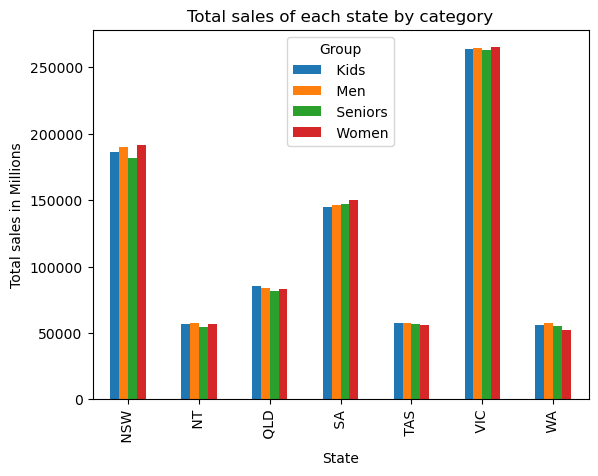

In [50]:
df= superstore.groupby(['State','Group'])['Sales'].sum().unstack('Group')
df=df/100
ax= df.plot(kind = 'bar',title='Total sales of each state by category')
ax.set_ylabel("Total sales in Millions");

VIC state showing the highest sales, NSW is the seoned highest. The least sales in WA

- Group-wise sales analysis (kids, women, men, and seniors) across different states.

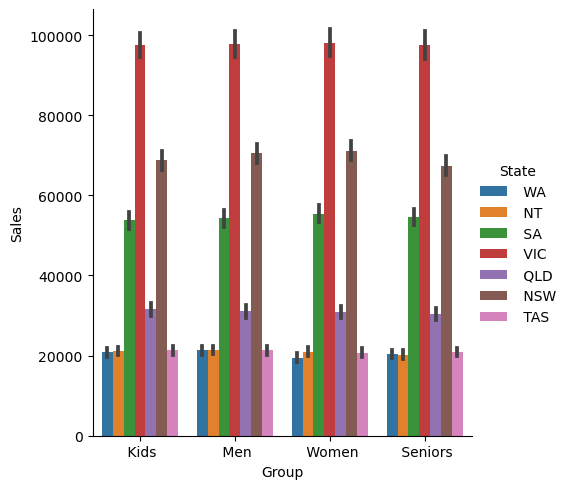

In [51]:
group_sale_per_state= superstore
sns.catplot(data=group_sale_per_state,kind='bar',x='Group',hue='State',y='Sales');

It could indecate that saling is seams to be nearly equal among the groups in every state

- Time-of-the-day analysis: 
   during which time of the day are sales the highest ?  during which time are sales the lowest

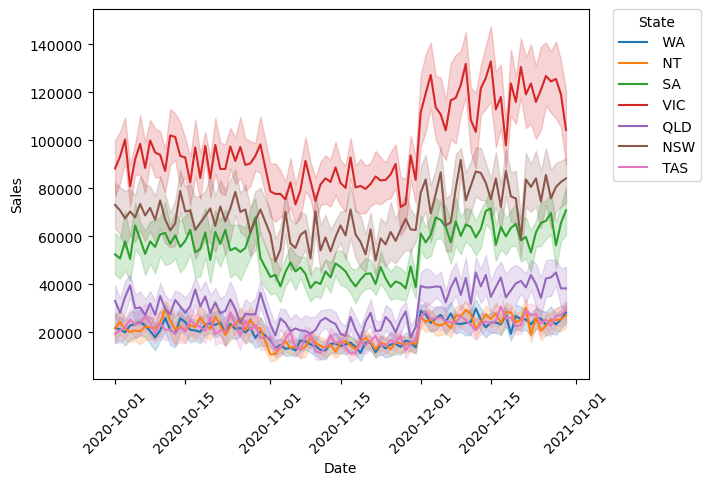

In [52]:
sns.lineplot(data=superstore, x='Date', y='Sales', hue='State')
plt.legend(title='State',bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

Above daily graph also showes VIC is high in sales among all the days.
NT ,TAS and WA are the least states of dalily sales. Also, Dec has a rise in sales and Nov. shows decrees in sales 

Shwoing Sales during the day time

/Users/khawlahd/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/khawlahd/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/khawlahd/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


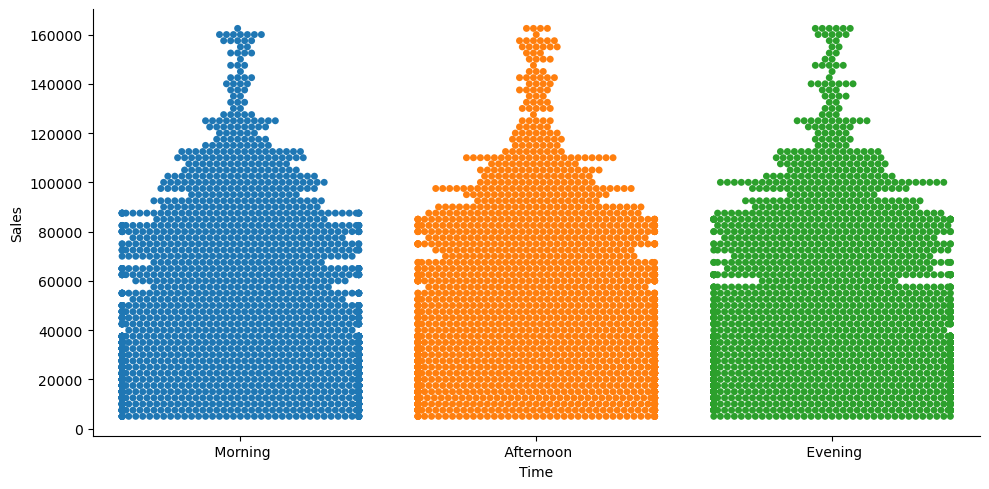

In [54]:
f=superstore.groupby(['Time'])
sns.catplot(data=superstore,x='Time',y='Sales',kind='swarm', height=5, aspect=2);

We want to show all observations along with some representation of the underlying distribution of sales during the day time. Evning shows less distribution of sales.

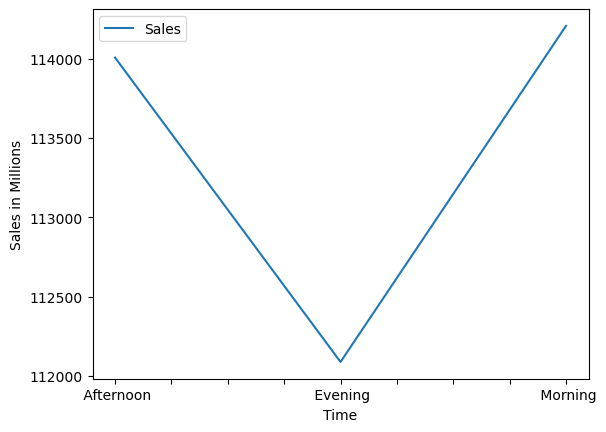

In [57]:
f= superstore.groupby(['Time']).sum()
f.Sales=f.Sales/1000
f.plot.line(subplots=True,ylabel='Sales in Millions');

This graph gives specific dateless where the decrees in sales happened. We interested to show the area where the decrees in total sales happened.   

- Evening time is less time of sales, morning is the highest. 

- Next is a map of Australia showing states’ sales 

In [58]:
#Adding latitude and languid along to each state
map_state_sales=state_sale # Total sales per state
map_state_sales =map_state_sales.reset_index()
map_state_sales['lon']=[145.612793,132.550964,142.702789,136.209152,146.315918,144.964600,117.793221]
map_state_sales['lat']=[-31.840233,-19.491411,-20.917574,-30.000233,-41.640079,-37.020100,-25.042261]
map_state_sales

,State,Sales,lon,lat
0,NSW,74970000,145.612793,-31.840233
1,NT,22580000,132.550964,-19.491411
2,QLD,33417500,142.702789,-20.917574
3,SA,58857500,136.209152,-30.000233
4,TAS,22760000,146.315918,-41.640079
5,VIC,105565000,144.964600,-37.020100
6,WA,22152500,117.793221,-25.042261


In [62]:
import folium
# Geojson file
world_geo = r'world_countries.json' 
map_ = folium.Map([-38.043995, 145.264296], zoom_start=5) #only interest on Australia

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

colors = ["royalblue","crimson","lightseagreen","orange","lightgrey","red","blue"]

# loop through the ... and add each to the incidents feature group

for i,row in map_state_sales.iterrows():
    incidents.add_child(
        folium.CircleMarker(
            [row.lat, row.lon],
            radius=row.Sales/5000000, # define how big you want the circle markers to be
            color=colors[i],
            fill=True,
            fill_color=colors[i],#'blue',
            fill_opacity=0.6
        )
    )


   
    
# add incidents to map
map_.add_child(incidents)
map_

From the data provided and analysis performed, we get the following:
States: 
- highest sales in VIC
- lowest sales in WA

  
WA having men with high interest we could make enlarge that section. Regarding the woman with low interest we could provide offers spacilaly in Dec.
